In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
fits_file = "tpf/tess-s0001-4-1_64.525833_-63.615669_64x64_astrocut.fits"

In [ ]:
cpm = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
cpm.set_poly_model(1, 4, 0.1)

In [ ]:
cpm.set_target_exclusion_predictors(32, 32)

In [ ]:
cpm.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(cpm, 10)

In [ ]:
cpm.entire_image(0.5, polynomials=True)

In [ ]:
tess_cpm.summary_plot(cpm, 10)

In [ ]:
apt, apt_lc = cpm.difference_image_sap(32, 32, 2, polynomials=True)

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(cpm.time, apt_lc)

# apt = apt.reshape(apt.shape[0], 9)
# for i in range(9):
#     plt.plot(cpm.time, apt[:, i])
plt.plot(cpm.time, apt_lc, ".", color="Red")

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
from astroquery.mast import Tesscut

In [ ]:
c = SkyCoord(64.525833, -63.615669, unit='deg')

In [ ]:
c.dec

In [ ]:
tesscut_test_download = Tesscut.download_cutouts(c)

In [ ]:
c = SkyCoord("5:33:05.28 -69:30:31.44", unit=(u.hourangle, u.deg))

In [ ]:
moa = Tesscut.download_cutouts(c, size=64, sector=2)

In [3]:
fits_file = "./tess-s0002-4-2_83.272000_-69.508733_64x64_astrocut.fits"
c = tess_cpm.CPM(fits_file, remove_bad=True)

Removing bad values by using the TESS provided "QUALITY" array


In [4]:
c.set_target_exclusion_predictors(32, 32)
c.set_poly_model(2, 4, 1.0)

In [5]:
c.lsq(0.5, rescale=True, polynomials=True)
print(c.scaled_centered_time)
print(c.v_matrix)
print(c.poly_params)

[-1.         -0.99847824 -0.99695648 ...  0.99695202  0.99847378
  1.        ]
[[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.99847824  0.9969588  -0.99544167]
 [ 1.         -0.99695648  0.99392223 -0.99089722]
 ...
 [ 1.          0.99695202  0.99391333  0.99088391]
 [ 1.          0.99847378  0.99694989  0.99542832]
 [ 1.          1.          1.          1.        ]]
[ 0.11270925  0.38668006 -0.24795596 -0.38835863]


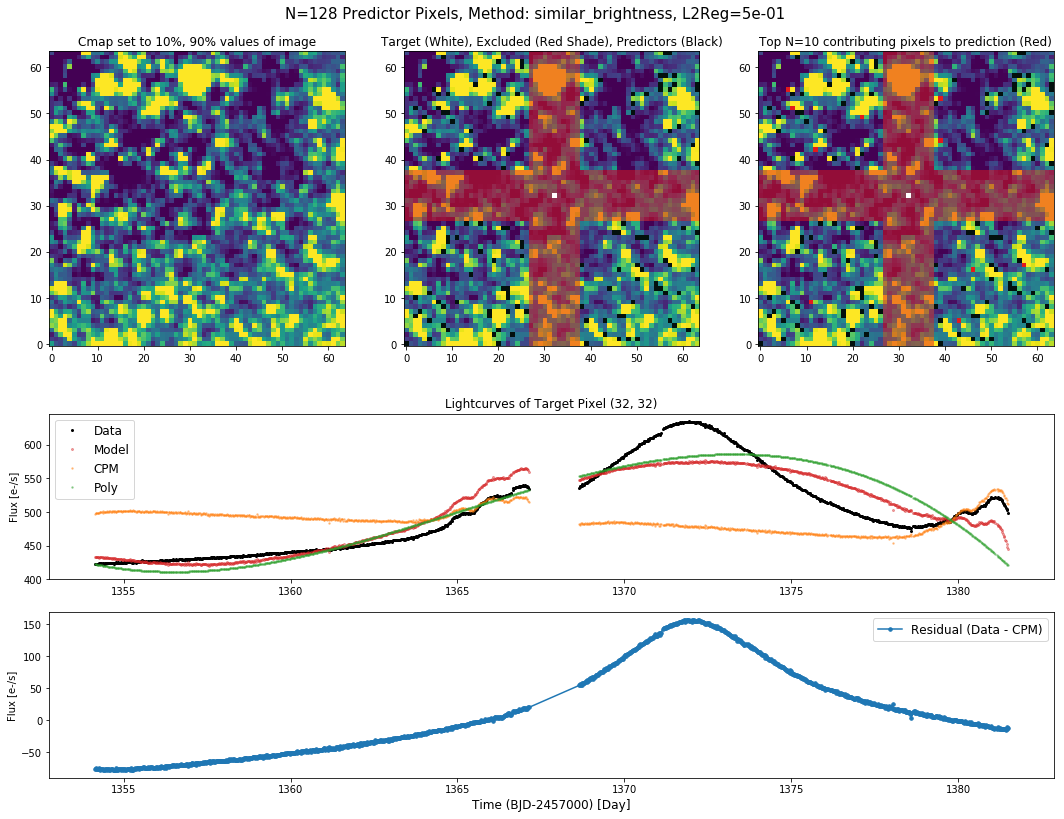

In [6]:
tess_cpm.summary_plot(c, 10)

In [ ]:
c.entire_image(0.5, rescale=True, polynomials=True)

In [14]:
apt, apt_lc = c.difference_image_sap(32, 32, 2, polynomials=True)

1
9
25
49


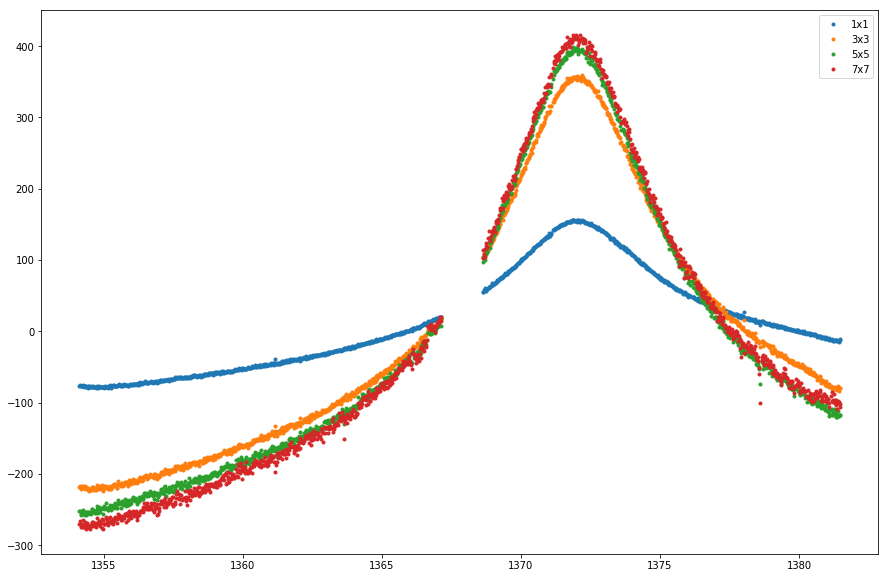

In [30]:
plt.figure(figsize=(15, 10))
for p in range(4):
    pixels = 2*p+1
    print(pixels**2)
    apt, apt_lc = c.difference_image_sap(32, 32, p, polynomials=True)
    plt.plot(c.time, apt_lc, ".", label="{}x{}".format(pixels, pixels))
plt.legend()

In [ ]:
plt.figure(figsize=(15 ,10))
# apt = apt.reshape(apt.shape[0], 25)
# for i in range(25):
#     plt.plot(c.time, apt[:, i])
plt.plot(c.time, apt_lc, ".", color="Red")

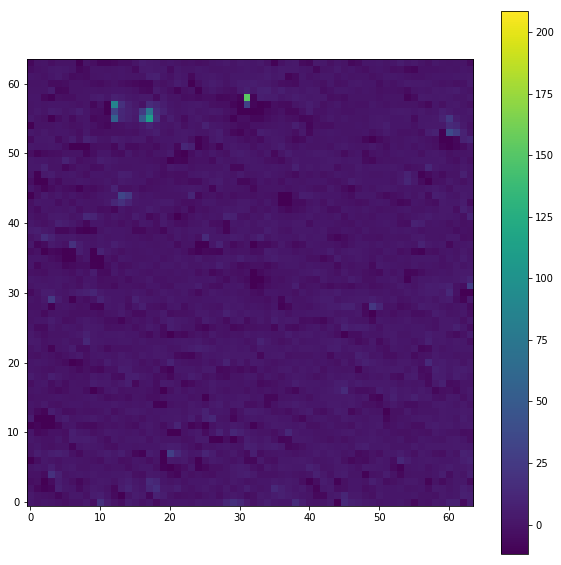

In [23]:
from IPython.display import HTML
import matplotlib.animation as animation
c.entire_image(0.5, rescale=True, polynomials=True)
diff = c.im_diff

fig = plt.figure(figsize=(10, 10))

ims = []
for i in range(0, diff.shape[0], 10):
    im = plt.imshow(diff[i], origin="lower", animated=True,
                   vmin=np.percentile(diff, 1), vmax=np.percentile(diff, 100));
    ims.append([im]);
fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [ ]:
c.set_target_exclusion_predictors(55, 40)
c.lsq(0.3, polynomials=False)
tess_cpm.summary_plot(c, 10)

In [ ]:
c.set_target_exclusion_predictors(55, 40)
c.lsq(0.3, polynomials=True)
tess_cpm.summary_plot(c, 10)

In [ ]:
ap, lc = c.difference_image_sap(55, 40, 1)

In [ ]:
plt.figure(figsize=(15, 10))
ap = ap.reshape(ap.shape[0], 9)
for i in range(9):
    plt.plot(c.time, ap[:, i], '-')
plt.plot(c.time, lc)

In [ ]:
I = np.identity(10)
ll = np.repeat(2, 6)
mm = np.repeat(4, 4)
i = np.hstack((ll, mm))
i

In [ ]:
i*I

In [ ]:
2*cpm.scaled_centered_time

In [ ]:
x = np.arange(25).reshape(5, 5)

In [ ]:
x[np.array([2,3,4]), np.array([1,2,3,4,5])]

In [ ]:
r = np.repeat(np.arange(31, 34), 3)
c = np.tile(np.arange(21, 24), 3)

In [ ]:
r

In [ ]:
c

In [ ]:
for (row, col) in zip(r, c):
    print(row, col)

In [13]:
from astropy.io import fits
with fits.open(fits_file, mode="readonly") as hdulist:
    wcs_info = WCS(hdulist[2].header)

In [10]:
wcs_info

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.272  -69.508733333333  
CRPIX : 33.375981434599  33.003834681935  
PC1_1 PC1_2  : 0.0010721613062813  0.0057536440949072  
PC2_1 PC2_2  : -0.0057580660403546  0.001047024297245  
CDELT : 1.0  1.0  
NAXIS : 64  64

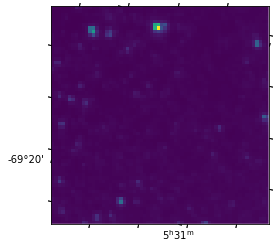

In [19]:
plt.subplot(111, projection=wcs_info)
plt.imshow(c.pixel_medians, origin="lower")

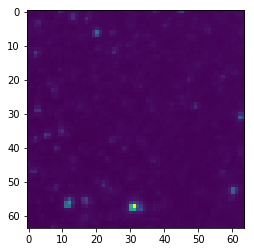

In [21]:
plt.subplot(111)
plt.imshow(c.pixel_medians)